# Exercici 1

Donades les imatges següents, trobar cares i ulls fent servir el mètode HaarFeatures amb diverses cascades de classificació . 

Avaluar les diverses cascades i escollir la que funciona millor. Justificar l'elecció




Imatge numero 1
Numero de cares = 23
Precisio model cara: 0.958333
Recall model cara: 1.000000
Precisio model ulls: 0.000000
Recall model ulls: 0.000000

Imatge numero 2
Numero de cares = 3
Precisio model cara: 1.000000
Recall model cara: 1.000000
Precisio model ulls: 1.000000
Recall model ulls: 0.666667

Imatge numero 3
Numero de cares = 3
Precisio model cara: 1.000000
Recall model cara: 0.333333
Precisio model ulls: 0.235294
Recall model ulls: 0.666667

Imatge numero 4
Numero de cares = 3
Precisio model cara: 0.250000
Recall model cara: 0.333333
Precisio model ulls: 0.333333
Recall model ulls: 1.000000


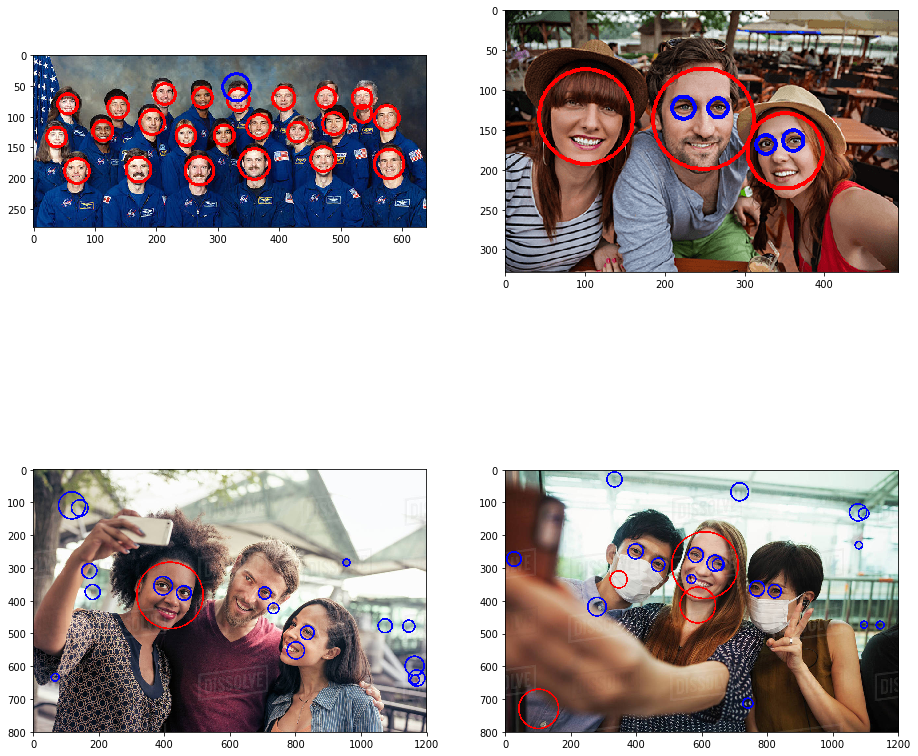

In [2]:
import cv2
import matplotlib.pyplot as plt 


def trobar_objectes(im, cascade):
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.equalizeHist(im_gray)
    #-- Detectem objectes
    deteccions = cascade.detectMultiScale(im)
    return deteccions

def dibuixar_deteccions(im, deteccions, color):
    # Cada detecció té la cantonada superior esquerra i les seves dimensions
    for (x,y,w,h) in deteccions:
        center = (x + w//2, y + h//2)
        im = cv2.ellipse(im, center, (w//2, h//2), 0, 0, 360, color, 4)
    return im

def evaluacio (idx, valors_reals):
    cares_prediccio = [24,3,1,4]
    cares_P = [23, 3,1,1] # detectats correctament
    cares_FP = [1,0,0,3]  # detectats falsos
    cares_FN = [0,0,2,2] # no detectats

    ulls_prediccio = [1,4,17,18]
    ulls_P = [0, 4,4,6]
    ulls_FP = [1,0,13,12]
    ulls_FN = [46,2,2,0] # no detectats
    
    # Precisio = P / (P+FP)
    precisio_cara = cares_P[idx] / (cares_P[idx] +cares_FP[idx])
    precisio_ulls = ulls_P[idx] / (ulls_P[idx] + ulls_FP[idx])
    
    # Recall = P / (P + FN
    recall_cara = cares_P[idx]/ (cares_P[idx]+cares_FN[idx])
    recall_ulls = ulls_P[idx]/ (ulls_P[idx]+ulls_FN[idx])
    
    #escriure resultats
    print("\nImatge numero %d"%(idx+1))
    print("Numero de cares = %d"%(valors_reals[idx]))
    print("Precisio model cara: %f"%(precisio_cara))
    print("Recall model cara: %f"%(recall_cara))
    print("Precisio model ulls: %f"%(precisio_ulls))
    print("Recall model ulls: %f"%(recall_ulls))


img_paths = ['Imatges/nasa.jpg', 'Imatges/faces1.png', 'Imatges/faces2.jpg', 'Imatges/faces3.jpg']
img_valors_reals = [23,3,3,3]



for idx, img_filename in enumerate(img_paths):
    im = cv2.imread(img_filename)
    # Passem imatge a format RGB per visualitzar-la correctament
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    
    face_cascade = cv2.CascadeClassifier()
    face_cascade.load("Data/haarcascade_frontalface_default.xml")
    
    profile_cascade = cv2.CascadeClassifier()
    profile_cascade.load("Data/lbpcascade_profileface.xml")
    
    eye_cascade = cv2.CascadeClassifier()
    eye_cascade.load("Data/haarcascade_eye.xml")

    cares_frontals = trobar_objectes(im, face_cascade)
    cares_perfil_dret = trobar_objectes(im, profile_cascade)
    ulls = trobar_objectes(im, eye_cascade)

    img_cares = dibuixar_deteccions(im, cares_frontals, (255, 0, 0)) # cares frontals: vermell
    img_cares = dibuixar_deteccions(im, cares_perfil_dret, (0, 255, 0 )) # cares perfil: verd
    img_cares = dibuixar_deteccions(im, ulls, (0, 0, 255 )) # ulls: blau
    
    plt.subplot(2,2,idx+1)
    plt.imshow(im)
    
    
    #Avaluacio de resultats
    evaluacio(idx,img_valors_reals)
    
fig = plt.gcf()
fig.set_size_inches(15.5, 15.5)


# Exercici 2

Crear un classificador per a la versió LITE de MNIST. Avaluar diferents classificadors i justificar el classificador escollit



Dimensionalitat mostres 64, nombre mostres 1797, nombre classes 10


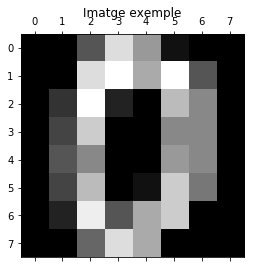

In [8]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

dataset = load_digits()
X = dataset.data
Y = dataset.target

print('Dimensionalitat mostres {}, nombre mostres {}, nombre classes {}'.format(X.shape[1], X.shape[0], len(set(Y))))

plt.matshow(dataset.images[0], cmap="gray")
plt.title('Imatge exemple' )
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [10]:
## https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

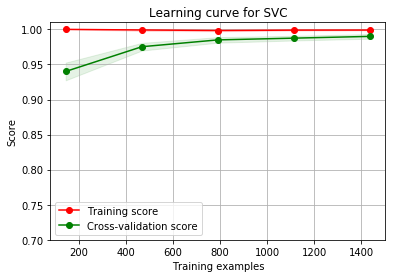

In [11]:
## SVC
from sklearn import svm

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

svc_model = svm.SVC(gamma=0.001, random_state=42)

plot_learning_curve(svc_model, "Learning curve for SVC", X, Y, (0.7, 1.01), cv=cv, n_jobs=4)

In [12]:
# Report
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

svc_model = svm.SVC(gamma=0.001, random_state=42)
svc_model.fit(X_train, y_train)

predictions = svc_model.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       1.00      1.00      1.00        11
          2       1.00      1.00      1.00        17
          3       1.00      0.94      0.97        17
          4       1.00      1.00      1.00        25
          5       0.96      1.00      0.98        22
          6       1.00      1.00      1.00        19
          7       0.95      0.95      0.95        19
          8       1.00      1.00      1.00         8
          9       0.96      0.96      0.96        25

avg / total       0.98      0.98      0.98       180



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

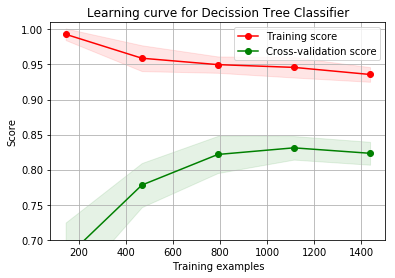

In [13]:
## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(max_depth=8, random_state=42)

plot_learning_curve(tree_model, "Learning curve for Decission Tree Classifier", X, Y, (0.7, 1.01), cv=cv, n_jobs=4)

In [14]:
# Report
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

tree_model = DecisionTreeClassifier(max_depth=8, random_state=42)
tree_model.fit(X_train, y_train)

predictions = tree_model.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      0.88      0.94        17
          1       0.73      0.73      0.73        11
          2       0.88      0.88      0.88        17
          3       0.81      0.76      0.79        17
          4       0.85      0.88      0.86        25
          5       0.90      0.86      0.88        22
          6       0.95      1.00      0.97        19
          7       0.77      0.89      0.83        19
          8       0.64      0.88      0.74         8
          9       0.90      0.76      0.83        25

avg / total       0.86      0.86      0.86       180



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

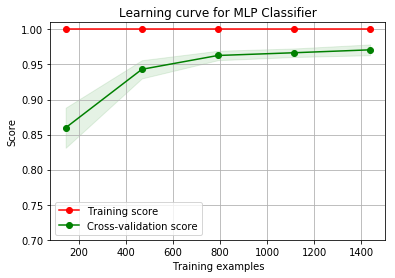

In [17]:
## MLP Classifier
from sklearn.neural_network import MLPClassifier

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

mlp_model = MLPClassifier(max_iter=200, random_state=42)

plot_learning_curve(mlp_model, "Learning curve for MLP Classifier", X, Y, (0.7, 1.01), cv=cv, n_jobs=4)

In [18]:
# Report
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

mlp_model = MLPClassifier(max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

predictions = mlp_model.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       1.00      1.00      1.00        11
          2       0.94      1.00      0.97        17
          3       1.00      0.88      0.94        17
          4       1.00      1.00      1.00        25
          5       0.96      1.00      0.98        22
          6       1.00      1.00      1.00        19
          7       1.00      0.95      0.97        19
          8       1.00      1.00      1.00         8
          9       0.96      1.00      0.98        25

avg / total       0.98      0.98      0.98       180



**RESPUESTA**:
De los tres clasificadores escogidos SVC, Decission Tree y MLP, el que mejor resultado da es SVC. Aunque los valores son muy parecidos a los de MLP, este último es mucho más lento de ejecutar.

# Exercici 3

Donat el dataset Boston, aplicar SVM per a predir el valor de la vivenda al barri de Boston. 

Aplicar també DecisionTrees per a regressió i indicar quina característica és la que té més influència en el preu 


In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [20]:
dataset = datasets.load_boston()
print(dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [21]:
print(dataset.data.shape)
print(dataset.target.shape)
print(dataset.keys())

(506, 13)
(506,)
dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [22]:
print(dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [23]:
# Transform to pandas dataframe
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["MEDV"] =pd.DataFrame(dataset.target)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [24]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### SVM

In [25]:
from sklearn import svm

In [30]:
# https://stackoverflow.com/a/50703596/844372
correlation = df.corr()
#correlation.style.background_gradient(cmap='coolwarm', axis=None)
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.4,-0.055,0.42,-0.22,0.35,-0.38,0.62,0.58,0.29,-0.38,0.45,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.4,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.055,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.62,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


In [31]:
# Set the features to train
features = pd.DataFrame(np.c_[df['RM'], df['LSTAT']], columns = ['RM', 'LSTAT'])
prices = df['MEDV']

In [32]:
# Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [33]:
# SVM Training
svm_model = svm.SVR(gamma=0.1, C=8)
svm_model = svm_model.fit(X_train, y_train)

In [34]:
## SVM Predictions
svm_predict =svm_model.predict(X_test)
print("{:.4f}".format(r2_score(y_test, svm_predict)))

0.7421


### DecisionTree 

In [35]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [36]:
def evaluate_property(model, X_train, y_train, X_test, y_test ):
    tree.fit(X_train, y_train)
    tree_train_pred = tree.predict(X_train)
    tree_test_pred = tree.predict(X_test)
    
    return r2_score(y_train, tree_train_pred), r2_score(y_test, tree_test_pred)

def plot_results(min_value, max_value, train_results, test_results, property_name):
    line1, = plt.plot(np.arange(min_value, max_value), train_results, 'b', label="Train R2 score")
    line2, = plt.plot(np.arange(min_value, max_value), test_results, 'r', label="Test R2 score")

    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

    plt.ylabel('R2 score')
    plt.xlabel(property_name)

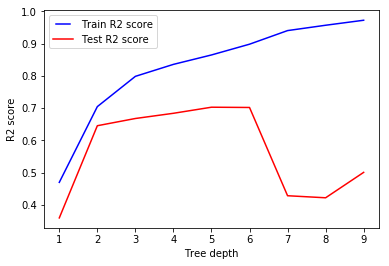

In [37]:
# Evaluation of max_depth

max_depth = 10
train_results = []
test_results = []

for value in range(1, max_depth):
    tree = DecisionTreeRegressor(max_depth = value, random_state=42)
    train_result, test_result = evaluate_property(tree, X_train, y_train, X_test, y_test)
    train_results.append(train_result)
    test_results.append(test_result)

plot_results(1, max_depth, train_results, test_results, "Tree depth")

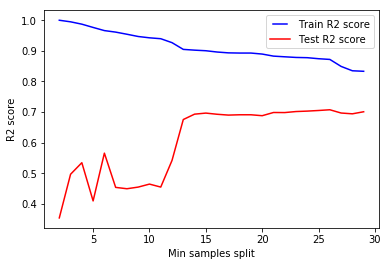

In [38]:
# Evaluation of min_samples_split
min_samples_split = 30
train_results = []
test_results = []

for value in range(2, min_samples_split):
    tree = DecisionTreeRegressor(min_samples_split = value, random_state=42)
    train_result, test_result = evaluate_property(tree, X_train, y_train, X_test, y_test)
    train_results.append(train_result)
    test_results.append(test_result)

plot_results(2, min_samples_split, train_results, test_results, "Min samples split")

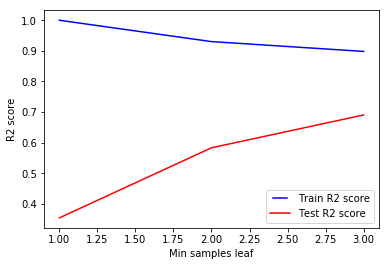

In [39]:
# Evaluation of min_samples_leaf
min_samples_leaf = 4
train_results = []
test_results = []

for value in range(1, min_samples_leaf):
    tree = DecisionTreeRegressor(min_samples_leaf = value, random_state=42)
    train_result, test_result = evaluate_property(tree, X_train, y_train, X_test, y_test)
    train_results.append(train_result)
    test_results.append(test_result)

plot_results(1, min_samples_leaf, train_results, test_results, "Min samples leaf")

In [40]:
# Tree Training
tree_model = DecisionTreeRegressor(max_depth=6, min_samples_split=15, random_state=42)
tree_model = tree_model.fit(X_train, y_train)

In [41]:
# Tree Predictions
tree_predict = tree_model.predict(X_test)
print("{:.4f}".format(r2_score(y_test, tree_predict)))

0.7195


**RESPUESTA**: Las características que más influencia tienen en los resultados es RM y LSTAT